# <span style="color:navy">  Exercises 12 - Machine Learning </span>


The main topic of these exercises is the Deep Neural Network, which is basically what we explored in Exercises 11 but with several hidden layers and neurons in each layer.

While last time we learned how to use Supervised Learning on functions regression, in the following exercises we are going instead to face a classification problem: train DNNs to recognise the ten handwritten digits (0-9). Using Keras, we are provided of the MNIST dataset: 70000 handwritten digits, represented in a square pixel grid 28×28 and each pixel can take on 256 gradation of the gray color.

## 12.1 Testing optimizers

The first exercise focuses of look at the performances of the trained models refered to different optimizers.

### Dataset and NN structure set up

In [2]:
import tensorflow as tf
from tensorflow import keras
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
import matplotlib.pyplot as plt
import json

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

def printscore(score):
    print('*******************************************************')
    print('Model performance:')
    print('– Test loss:', score[0])
    print('– Test accuracy:', score[1])
    print('*******************************************************')

In [3]:
###### DATA ##########################################
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

###### DNN ##########################################
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


### Training on SGD

In [4]:
'''def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=SGD(),metrics=['accuracy'])
    return model

# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, Y_test))'''

"def compile_model():\n    # create the model\n    model=create_DNN()\n    # compile the model\n    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=SGD(),metrics=['accuracy'])\n    return model\n\n# training parameters\nbatch_size = 32\nepochs = 5\n\n# create the deep neural net\nmodel_DNN = compile_model()\n\n# train DNN and store training info in history\nhistory = model_DNN.fit(X_train, Y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, Y_test))"

### Performance of SGD

In [5]:
'''plt.rcParams['figure.figsize'] = [17, 6]
fig, ax = plt.subplots(1,2)

hist=['accuracy', 'loss'] 
val_hist=['val_accuracy', 'val_loss']

# summarize history for accuracy and loss
for i in range(2):
    ax[i].plot(history.history[hist[i]])
    ax[i].plot(history.history[val_hist[i]])
    ax[i].set_ylabel('model '+hist[i])
    ax[i].set_xlabel('epoch')
    ax[i].legend(['train', 'test'], loc='best')
    ax[i].grid()
    ax[i].set_title(hist[i], size='x-large')
plt.show()

score = model_DNN.evaluate(X_test, Y_test, verbose=0)
printscore(score)

predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)'''

'plt.rcParams[\'figure.figsize\'] = [17, 6]\nfig, ax = plt.subplots(1,2)\n\nhist=[\'accuracy\', \'loss\'] \nval_hist=[\'val_accuracy\', \'val_loss\']\n\n# summarize history for accuracy and loss\nfor i in range(2):\n    ax[i].plot(history.history[hist[i]])\n    ax[i].plot(history.history[val_hist[i]])\n    ax[i].set_ylabel(\'model \'+hist[i])\n    ax[i].set_xlabel(\'epoch\')\n    ax[i].legend([\'train\', \'test\'], loc=\'best\')\n    ax[i].grid()\n    ax[i].set_title(hist[i], size=\'x-large\')\nplt.show()\n\nscore = model_DNN.evaluate(X_test, Y_test, verbose=0)\nprintscore(score)\n\npredictions = model_DNN.predict(X_test)\n\nX_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)\n\nplt.figure(figsize=(15, 15)) \nfor i in range(10):    \n    ax = plt.subplot(2, 10, i + 1)    \n    plt.imshow(X_test[i, :, :, 0], cmap=\'gray\')    \n    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    \n    plt.axis(\'off\') \nplt.show()\nX_test =

### Comparison with other optimizers: Adam, RMSprop, Adagrad, Adadelta

SGD


/home/fefe/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-03 15:14:55.972647: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


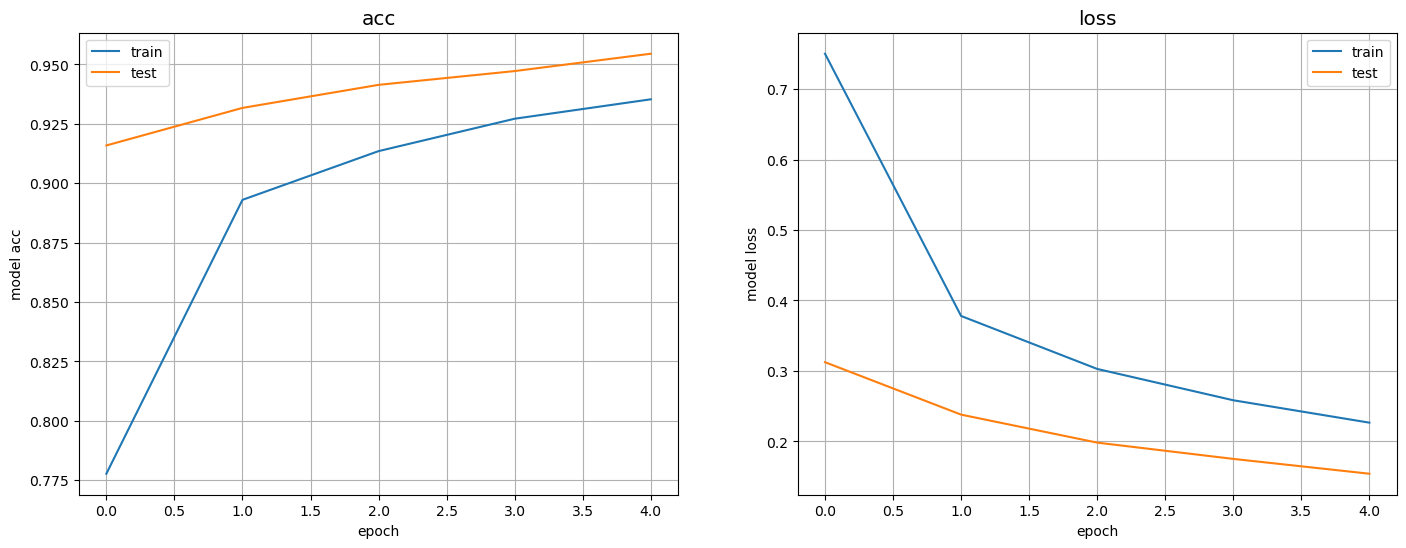

*******************************************************
Model performance:
– Test loss: 0.1541953980922699
– Test accuracy: 0.9545000195503235
*******************************************************
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


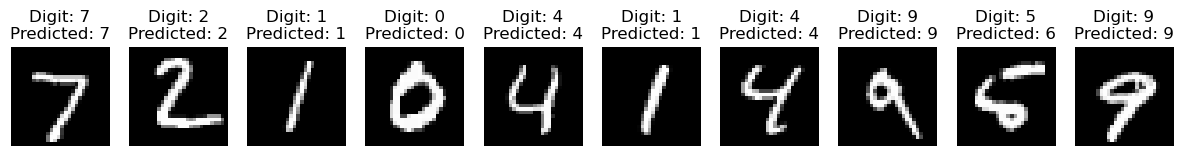


Adam


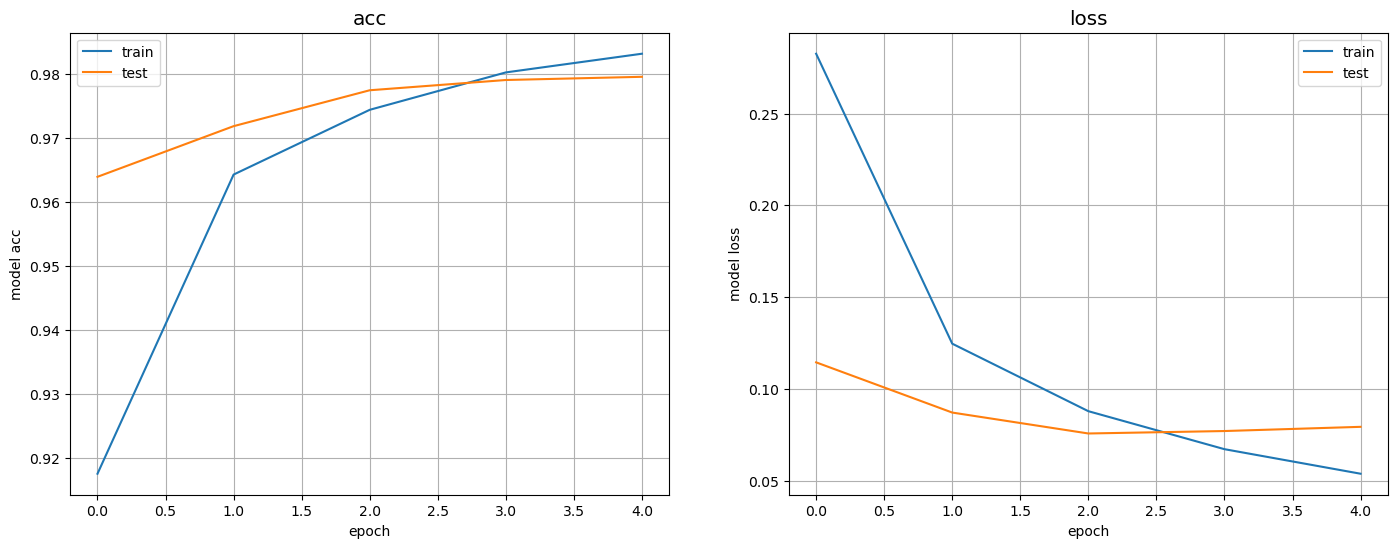

*******************************************************
Model performance:
– Test loss: 0.07945436239242554
– Test accuracy: 0.9794999957084656
*******************************************************
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


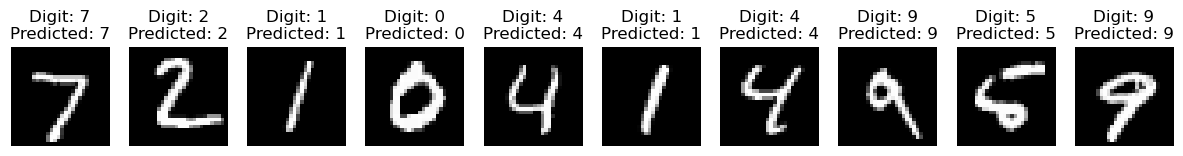


RMSprop


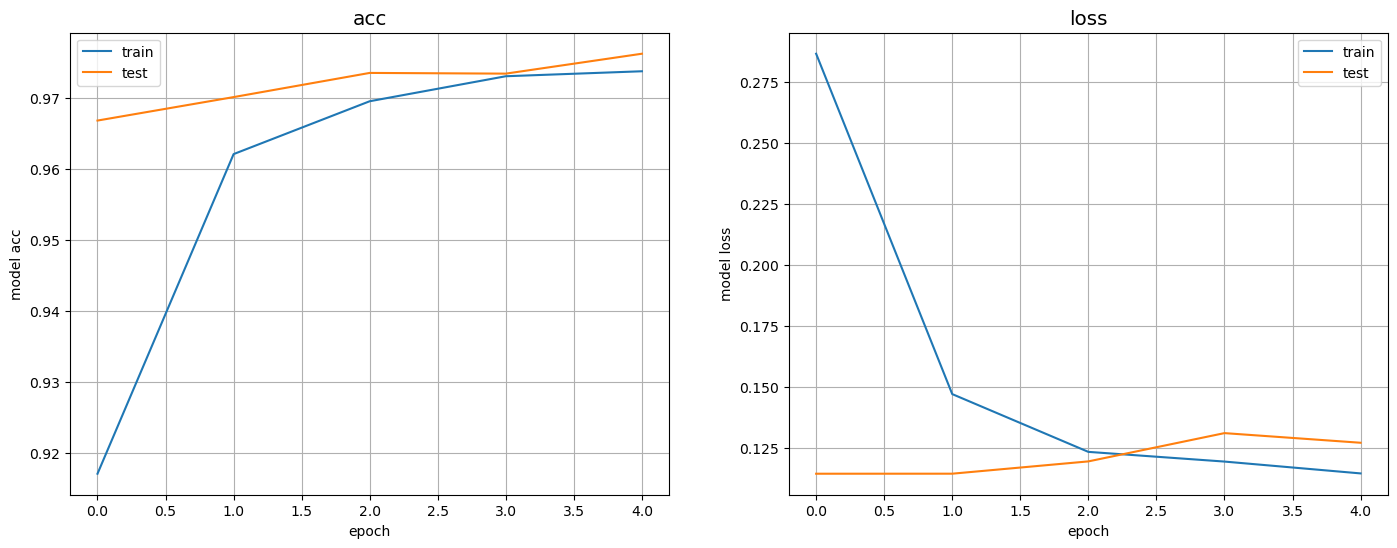

*******************************************************
Model performance:
– Test loss: 0.12707458436489105
– Test accuracy: 0.9761999845504761
*******************************************************
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


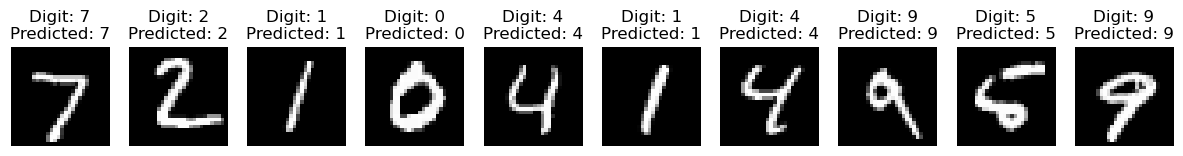


Adagrad


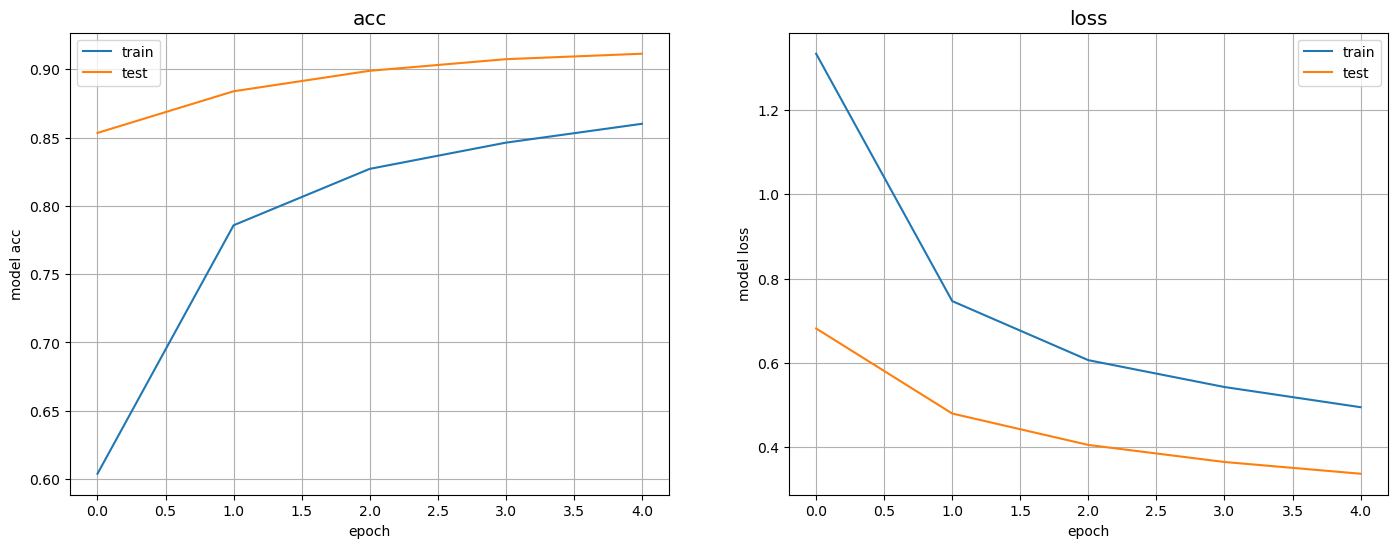

*******************************************************
Model performance:
– Test loss: 0.33677756786346436
– Test accuracy: 0.9114000201225281
*******************************************************
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


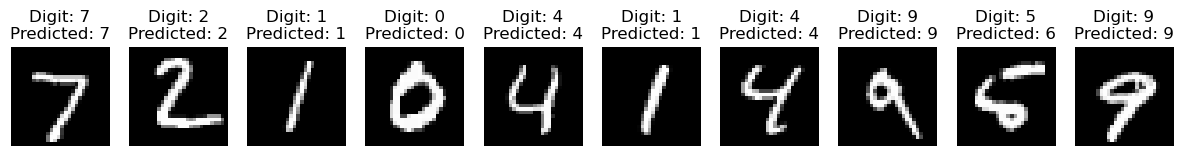


Adadelta


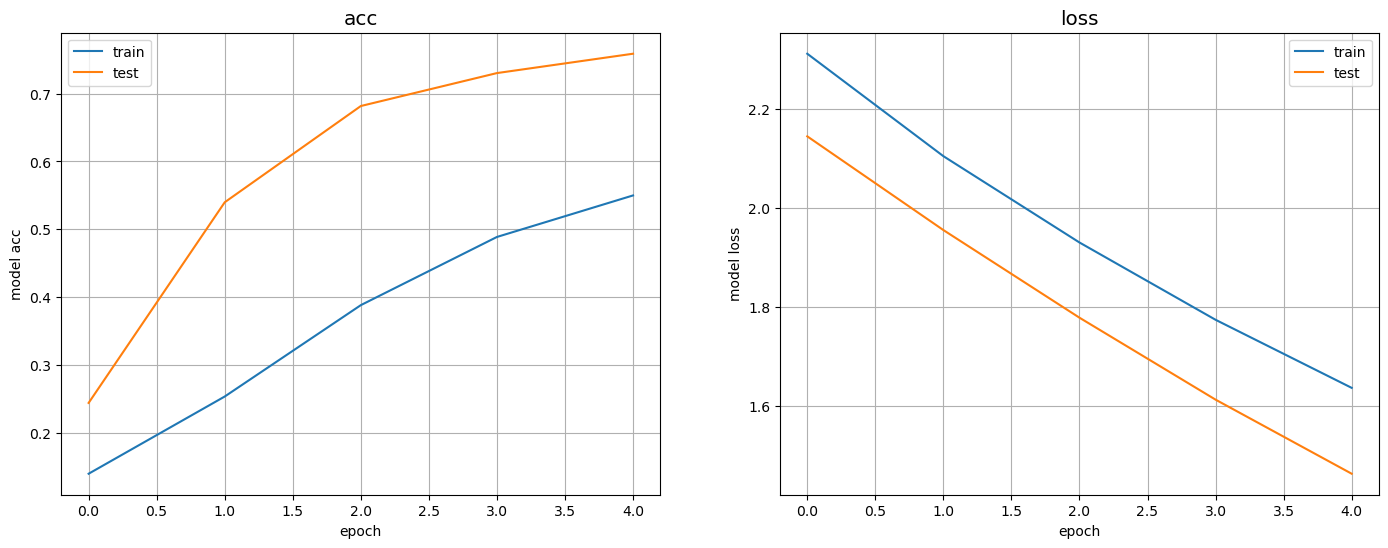

*******************************************************
Model performance:
– Test loss: 1.4639205932617188
– Test accuracy: 0.7585999965667725
*******************************************************
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


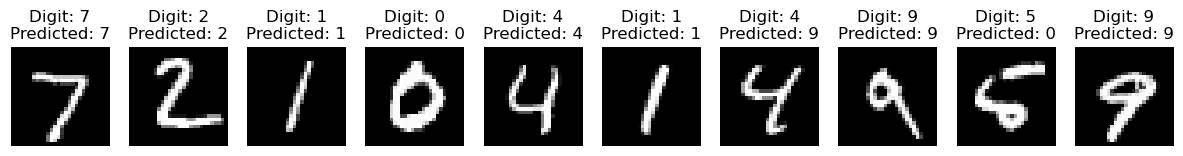

In [6]:
models=['SGD', 'Adam', 'RMSprop','Adagrad','Adadelta']
# training parameters
batch_size = 32
epochs = 5
hist=['acc', 'loss'] 
val_hist=['val_acc', 'val_loss']
for m in range(5):
    print(models[m])
    model=create_DNN()
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=models[m],
                  metrics=['acc'])
    plt.rcParams['figure.figsize'] = [17, 6]
    fig, ax = plt.subplots(1,2)
    
    # train DNN and store training info in history
    history = model.fit(X_train, Y_train, batch_size=batch_size,epochs=epochs,verbose=0,validation_data=(X_test, Y_test))
    # summarize history for accuracy and loss
    for k in range(2):
        ax[k].plot(history.history[hist[k]])
        ax[k].plot(history.history[val_hist[k]])
        ax[k].set_ylabel('model '+hist[k])
        ax[k].set_xlabel('epoch')
        ax[k].legend(['train', 'test'], loc='best')
        ax[k].grid()
        ax[k].set_title(hist[k], size='x-large')
    plt.show()
    score = model.evaluate(X_test, Y_test, verbose=0)
    printscore(score)
    predictions = model.predict(X_test)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
    
    fig = plt.figure(figsize=(15, 15))
    for i in range(10):    
        ax = plt.subplot(3, 10, i + 1)    
        plt.imshow(X_test[i, :, :, 0], cmap='gray')    
        plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
        plt.axis('off') 
    plt.show()
    X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
    print("")

From these results we can then conclude that smaller values of loss and higher values of accuracy are directly related to more time involved to run each epoch.

Anyway we can notice that most of the optimizers work very well (accurancy > $95\%$), recognising all the digits. SGD, Adagrad and Adadelta did not predict a bad written 5. Adadelta also did not predict digit 4. Adagrad accurancy is $\geq 91\%$ instead Adadelta accurency is $\geq 75\%$

It is then up to the programmer choose between accurancy and computational efficiency according to the model one is working on.

## 12.2 Convolutional Neural Network

In exercise 12.1, we considered images as 1-D vectors of 28 × 28 = 784 pixels. However, it would be certainly useful to leverage translational invariance and local spatial correlations that we expect to find in handwritten digit images. This characteristic can be achieved using convolutional layers. In addition to these, we use filters (MaxPooling) that reduce the dimensionality of the original image. A combination of these types of layers should be able to identify spatial patterns that characterize written digits.

The processed data is then transformed into a 1-D vector through the Flatten layer and further analyzed by the rest of the network. The last layer will necessarily contain 10 neurons (output). Being notably efficient in classification problems, the activation function for the last layer is usually softmax. With a network of this type, we should be able to increase accuracy compared to the non-convolutional networks considered so far.

The detailed structure is schematized below:

- Convolutional layer with 10 filters (it's necessary that they are the same number as possible outputs)
- Pooling layer
- Convolutional layer with 10 filters
- Flattening layer
- Dense all-to-all layer of 20 neurons
- Dense all-to-all layer of 20 neurons
- Dropout layer (with 50% probability)
- Dense all-to-all output layer

The convolutional and dense layers (except the last one) have a ReLU activation function. We chose the SGD optimizer and 8 epochs to train the algorithm.

In [10]:
#load and process the data
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [11]:
# reshaping for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [12]:
#building the CNN
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))

    model.add(MaxPool2D(pool_size=(3,3),strides=1))
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu'))
    model.add(Flatten())
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation='softmax')) #output layer
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

In [13]:
#Training the model

# training parameters
batch_size = 32
epochs = 8

# create the deep conv net
model_CNN=create_CNN()

model_CNN.summary()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 22, 22, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 10)     │         2,510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3240)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 20)             │        64,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,220 (266.48 KB)

 Trainable params: 68,220 (266.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.5202 - loss: 1.3572 - val_acc: 0.9567 - val_loss: 0.1630
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - acc: 0.8236 - loss: 0.5127 - val_acc: 0.9739 - val_loss: 0.0994
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - acc: 0.8612 - loss: 0.4102 - val_acc: 0.9802 - val_loss: 0.0737
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - acc: 0.8728 - loss: 0.3602 - val_acc: 0.9817 - val_loss: 0.0687
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - acc: 0.8769 - loss: 0.3381 - val_acc: 0.9825 - val_loss: 0.0635
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - acc: 0.8842 - loss: 0.3155 - val_acc: 0.9839 - val_loss: 0.0602
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - acc: 0.8890 - loss: 0.3022 - val_acc: 0.9846 - val_loss: 0.0585
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - acc: 0.8951 - loss: 0.2838 - val_acc: 0.9857 - val_loss: 0.0552


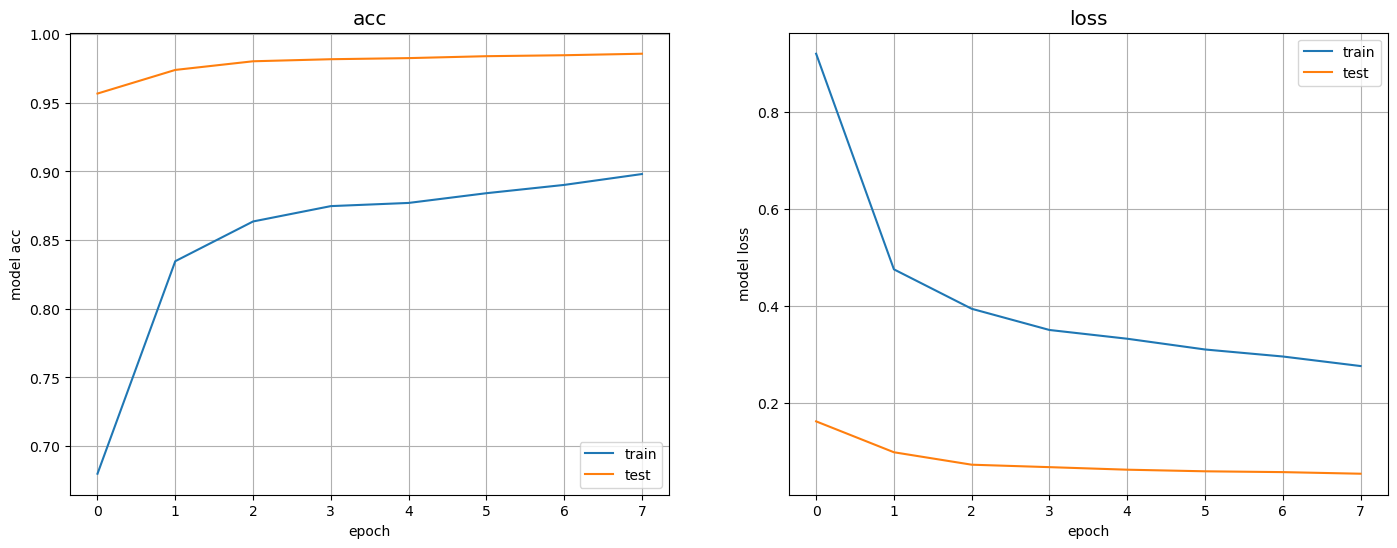

*******************************************************
Model performance:
– Test loss: 0.055166393518447876
– Test accuracy: 0.9857000112533569
*******************************************************
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


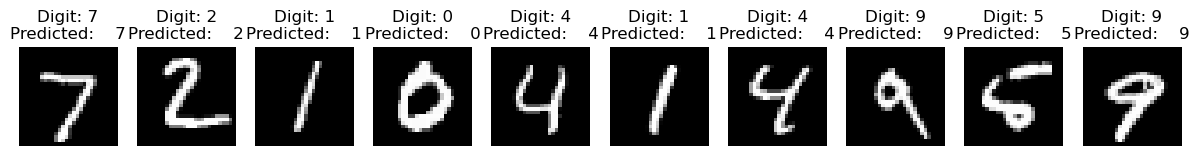

In [14]:
###### PERFORMANCE ##########################################
plt.rcParams['figure.figsize'] = [17, 6]
fig, ax = plt.subplots(1,2)

hist=['acc', 'loss'] 
val_hist=['val_acc', 'val_loss']

# summarize history for accuracy and loss
for i in range(2):
    ax[i].plot(history.history[hist[i]])
    ax[i].plot(history.history[val_hist[i]])
    ax[i].set_ylabel('model '+hist[i])
    ax[i].set_xlabel('epoch')
    ax[i].legend(['train', 'test'], loc='best')
    ax[i].grid()
    ax[i].set_title(hist[i], size='x-large')
plt.show()

score = model_CNN.evaluate(X_test, Y_test, verbose=0)
printscore(score)

predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

A significant improvement in test data accuracy is observed, demonstrating the effectiveness of the dropout layer. Additionally, all digits have been correctly classified.

## 12.3 Our handwritten digits

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


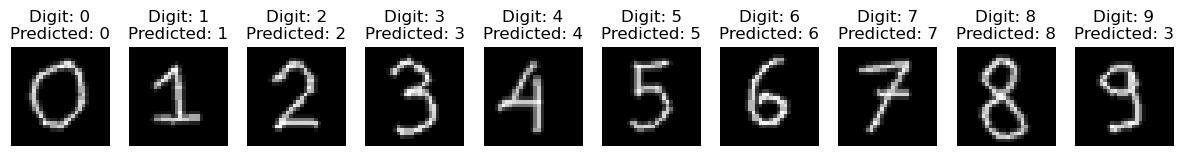

In [15]:
from PIL import Image
    
plt.figure(figsize=(15,15))

for d in range(10): 
    digit_filename = ""+str(d)+".png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    #print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]
    data /= 255
    ax = plt.subplot(3, 10, d + 1) 
    plt.imshow(data, cmap='gray')
    #plt.imshow(X_test[i, :, :, 0], cmap='gray') 
    data = data.reshape(1, img_rows, img_cols, 1)
    prediction=model_CNN.predict(data)
    plt.title("Digit: "+str(d)+"\nPredicted: "+str(np.argmax(prediction)))   
    plt.axis('off') 
plt.show()